<a href="https://colab.research.google.com/github/DoCaoDuy/BaitapAI/blob/main/AI_W4_25_02_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 30.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=34d38069a41a0ade3a01f22016aa80b6e34c45eb75d8874d635b5ae5d83b7ce7
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


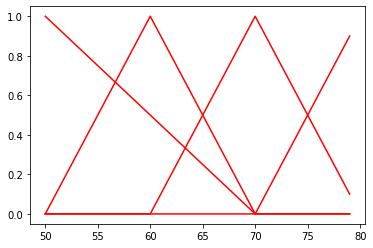

In [ ]:
import numpy as np 
import skfuzzy as fuzz 
import matplotlib.pyplot as plt 
x = np.arange(50,80,1)
slow  = fuzz.trimf(x,[50,50,70])
medium = fuzz.trimf(x,[50,60,70])
medium_fast = fuzz.trimf(x,[60,70,80])   
fast = fuzz.trimf(x,[70,80,80])          
plt.figure()
plt.plot(x,slow,'r',linewidth = 1.5 , label='slow')
plt.plot(x,medium,'r',linewidth = 1.5 , label='medium')
plt.plot(x,medium_fast,'r',linewidth = 1.5 , label='medium_fast')
plt.plot(x,fast,'r',linewidth = 1.5 , label='fast')

25.515706032513773


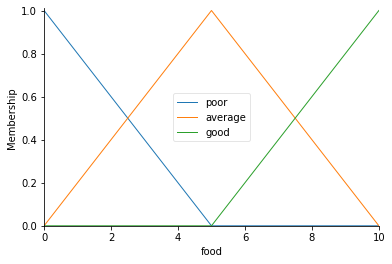

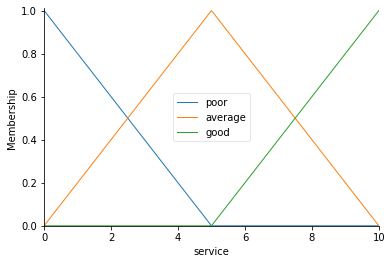

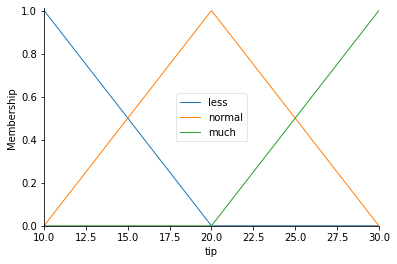

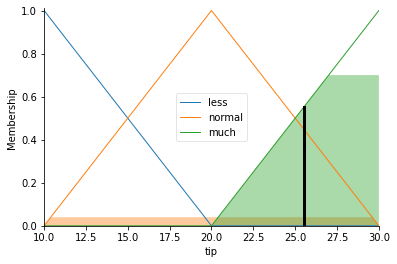

In [ ]:
import numpy as np 
import skfuzzy as fuzz 
from skfuzzy import control as ctrl 

food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,31,1),'tip')

food['poor'] = fuzz.trimf(food.universe,[0,0,5])
food['average']=fuzz.trimf(food.universe,[0,5,10])
food['good']=fuzz.trimf(food.universe,[5,10,10])

service['poor']=fuzz.trimf(service.universe,[0,0,5])
service['average']=fuzz.trimf(service.universe,[0,5,10])
service['good']=fuzz.trimf(service.universe,[5,10,10])

tip['less']=fuzz.trimf(tip.universe,[10,10,20])
tip['normal']=fuzz.trimf(tip.universe,[10,20,30])
tip['much']=fuzz.trimf(tip.universe,[20,30,30])

food.view()
service.view()
tip.view()

Rule1 = ctrl.Rule(food['poor'] & service['poor'], tip['less'])
Rule2 = ctrl.Rule(food['poor'] & service['average'], tip['less'])
Rule3 = ctrl.Rule(food['poor'] & service['good'], tip['normal'])

Rule4 = ctrl.Rule(food['average'] & service['poor'], tip['less'])
Rule5 = ctrl.Rule(food['average'] & service['average'], tip['normal'])
Rule6 = ctrl.Rule(food['average'] & service['good'], tip['much'])

Rule7 = ctrl.Rule(food['good'] & service['poor'], tip['normal'])
Rule8 = ctrl.Rule(food['good'] & service['average'], tip['much'])
Rule9 = ctrl.Rule(food['good'] & service['good'], tip['much'])

tipping_ctrl = ctrl.ControlSystem([Rule1,Rule2,Rule3,Rule4,Rule5,Rule6,Rule7,Rule8,Rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food'] = 6.5
tipping.input['service'] = 9.8
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)






76.64397731064403


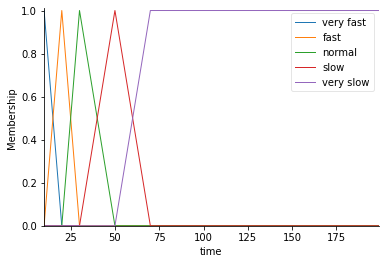

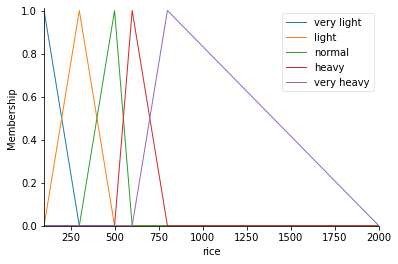

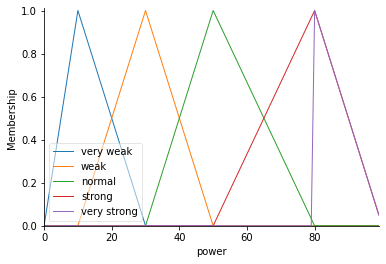

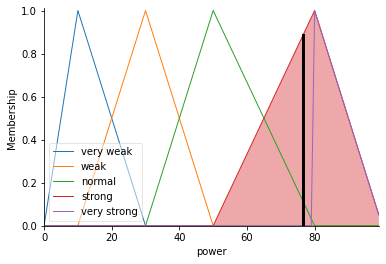

In [46]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

time = ctrl.Antecedent(np.arange(10,200,1),'time')
rice = ctrl.Antecedent(np.arange(100,2001,1),'rice')

power = ctrl.Consequent(np.arange(0,100,1),'power')

power['very weak']=fuzz.trimf(power.universe,[0,10,30])
power['weak']=fuzz.trimf(power.universe,[10,30,50])
power['normal']=fuzz.trimf(power.universe,[30,50,80])
power['strong']=fuzz.trimf(power.universe,[50,80,100])
power['very strong']=fuzz.trimf(power.universe,[80,80,100])

time['very fast'] = fuzz.trimf(time.universe,[10,10,20])
time['fast'] = fuzz.trimf(time.universe,[10,20,30])
time['normal'] = fuzz.trimf(time.universe,[20,30,50])
time['slow'] = fuzz.trimf(time.universe,[30,50,70])
time['very slow'] = fuzz.trapmf(time.universe,[50,70,199,199])

rice['very light'] = fuzz.trimf(rice.universe,[100,100,300])
rice['light'] = fuzz.trimf(rice.universe,[100,300,500])
rice['normal'] = fuzz.trimf(rice.universe,[300,500,600])
rice['heavy'] = fuzz.trimf(rice.universe,[500,600,800])
rice['very heavy'] = fuzz.trimf(rice.universe,[600,800,2000])


time.view()
rice.view()
power.view()

Rule1 = ctrl.Rule(time['very fast']&rice['very light'],power['normal'])
Rule2 = ctrl.Rule(time['fast']&rice['very light'],power['normal'])
Rule3 = ctrl.Rule(time['normal']&rice['very light'],power['normal'])
Rule4 = ctrl.Rule(time['slow']&rice['very light'],power['weak'])
Rule5 = ctrl.Rule(time['very slow']&rice['very light'],power['very weak'])

Rule6 = ctrl.Rule(time['very fast']&rice['light'],power['strong'])
Rule7 = ctrl.Rule(time['fast']&rice['light'],power['strong'])
Rule8 = ctrl.Rule(time['normal']&rice['light'],power['normal'])
Rule9 = ctrl.Rule(time['slow']&rice['light'],power['normal'])
Rule10 = ctrl.Rule(time['very slow']&rice['light'],power['weak'])

Rule11 = ctrl.Rule(time['very fast']&rice['normal'],power['very strong'])
Rule12 = ctrl.Rule(time['fast']&rice['normal'],power['strong'])
Rule13 = ctrl.Rule(time['normal']&rice['normal'],power['strong'])
Rule14 = ctrl.Rule(time['slow']&rice['normal'],power['normal'])
Rule15 = ctrl.Rule(time['very slow']&rice['normal'],power['weak'])

Rule16 = ctrl.Rule(time['very fast']&rice['heavy'],power['very strong'])
Rule17 = ctrl.Rule(time['fast']&rice['heavy'],power['very strong'])
Rule18 = ctrl.Rule(time['normal']&rice['heavy'],power['strong'])
Rule19 = ctrl.Rule(time['slow']&rice['heavy'],power['normal'])
Rule20 = ctrl.Rule(time['very slow']&rice['heavy'],power['weak'])

Rule21 = ctrl.Rule(time['very fast']&rice['very heavy'],power['very strong'])
Rule22 = ctrl.Rule(time['fast']&rice['very heavy'],power['very strong'])
Rule23 = ctrl.Rule(time['normal']&rice['very heavy'],power['strong'])
Rule24 = ctrl.Rule(time['slow']&rice['very heavy'],power['strong'])
Rule25 = ctrl.Rule(time['very slow']&rice['very heavy'],power['normal'])

#Cho may hoc
power_ctrl= ctrl.ControlSystem([Rule1,Rule2,Rule3,Rule4,Rule5,
                                Rule6,Rule7,Rule8,Rule9,Rule10,
                                Rule11,Rule12,Rule13,Rule14,Rule15,
                                Rule16,Rule17,Rule18,Rule19,Rule20,
                                Rule21,Rule22,Rule23,Rule24,Rule25])
powering = ctrl.ControlSystemSimulation(power_ctrl)

powering.input['rice']=500
powering.input['time']=30
powering.compute()
print(powering.output['power'])
power.view(sim=powering)